## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
    - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
    - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
    - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
    - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
    - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
    
[표분분산이 분산을 과소 평가하는 이유]

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모(집단)평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표 본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.



#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값


In [1]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('./ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


### 영어 점수불러와 어레이와 학생이름 부여한 데이터프레임 만들기

In [12]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [14]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                       name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균값

In [17]:
display(np.mean(scores))
display(scores_df.mean())

55.0

score    55.0
dtype: float64

### 중앙값

In [24]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [27]:
n = len(sorted_scores)
if n% 2 == 0:
    m0 = sorted_scores[n //2 -1]
    m1 = sorted_scores[n //2]
    median = (m0 + m1) /2
else:
    median = sorted_scores[(n+1)//2-1]
median

56.5

In [25]:
np.median(scores)

56.5

In [23]:
scores_df.median()

score    56.5
dtype: float64

### 최빈값

In [28]:
data = [1,1,1,2,2,3]
pd.Series(data).mode()

0    1
dtype: int64

In [32]:
data1 = [1,2,3,4,5]
pd.Series(data1).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

### 편차

In [35]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [40]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

#### 편차들의 평균 항상 0

In [42]:
np.mean(deviation)

0.0

### 데이터 프레임에 편차까지 정리

In [43]:
summary_df = scores_df.copy()
summary_df[' deviation '] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [44]:
summary_df.mean()

score          55.0
 deviation      0.0
dtype: float64

### 분산

In [45]:
np.mean(deviation ** 2)

86.0

#### 넘파이 에서 분산값 ( 기본값 : 표본분산)

In [46]:
np.var(scores)

86.0

#### 판다스에서의 분산값 ( 기본값: 불편분산)

In [47]:
scores_df.var()

score    95.555556
dtype: float64

In [53]:
# 판다스에서 표본분산으로 분산 구하기
scores_df.var(ddof=0)

score    86.0
dtype: float64

In [54]:
summary_df['square of deviation '] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [55]:
summary_df.mean()

score                   55.0
 deviation               0.0
square of deviation     86.0
dtype: float64

### 표준편차

In [56]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [57]:
np.std(scores, ddof=0)

9.273618495495704

### 범위
- (분산과 표준편차와 달리 데이터의 전체가 아니라 최대값과 최소값으로 산포도 표현)

In [58]:
np.max(scores) - np.min(scores)

28

#### 사분위 범위( 상위수 % - 하위수%) 일반적으로 25%-75%

In [59]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [60]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

## 데이터 정규화

### 표준화

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [2]:
scores = np.array(df.english)[:10]
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


#### 데이터에서 평균을 빼고 표준편차로 나누는 작업을 표준화 라고 함, 이 데이터를 표준화변량 또는 Z점수 라고 함

In [3]:
# (데이터-데이터평균)/표준편차 = 표준화변량|z점수
z = (scores - np.mean(scores)) / np.std(scores) 
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [4]:
# 표준화된 데이터는 평균이 0, 표준편차가 1 
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

### 편차값 (편차값은 평균이 50, 표준편차가 10이 되도록 정규화한 값)

In [5]:
# z = 50 + 10 * (scores - np.mean(scores))/ np.std(scores)
z = 50 + 10 * z 
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [6]:
scores_df['deviation_value'] = z
scores_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


## 1차원 데이터의 시각화

In [8]:
import numpy as np
english_scores = np.array(df['english'])
english_scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [9]:
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe() 

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

### 도수분포표

In [12]:
# bins = 계급 폭,  각클래스 구간 = 계급, 계급안의 값 수 = 도수, 총계급수=계급 수
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [14]:
# 0~10, 10~20, ...이라는 문자열 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_class

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

In [15]:
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class,
                                         name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


- 계급값(각 계급의 중앙값)

In [16]:
class_value = [(i + (i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

- 상대도수( 해당 계급의 데이터 차지 비율)

In [17]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

- 누적상대도수 (해당 계급까지의 상대도수의 누적합)

In [18]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

#### 계급값과 상대도수와 누적상대도수를 도수분포표에 추가

In [21]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency '] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency ']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


- 최빈값 (가장 많은값을 가진 계급)

In [22]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

### 히스토그램

In [25]:
import matplotlib.pyplot as plt
# 그래프가 jupyter notebook 위에 표시
%matplotlib inline  

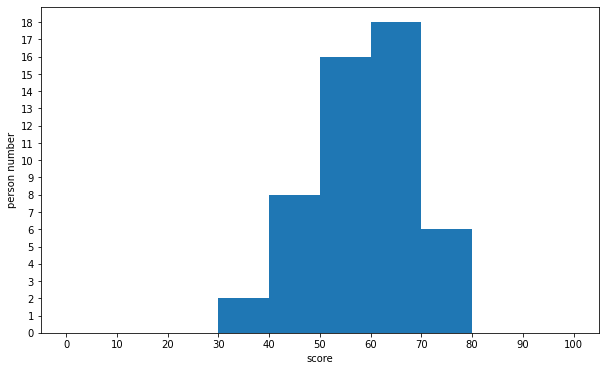

In [29]:
# figsize로 가로 세로 크기 지정
fig = plt.figure(figsize=(10,6))
# 인수는 영역을 1x1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq,_,_= ax.hist(english_scores, bins=10, range=(0,100))
# x,y축에 레이블 부여
ax.set_xlabel('score')
ax.set_ylabel('person number')
# x축을 0,10,20 ...100 , y축을 0,1,2, 눈금으로 구분
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show()

- 계급폭을 4로 즉 계급수를 25개로 히스토그램 출력하기

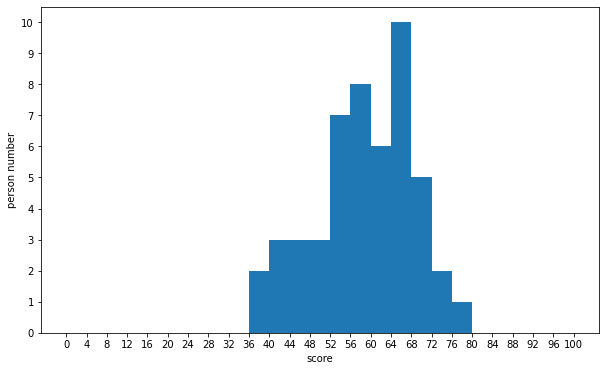

In [31]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores,bins=25,range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show()

- add_subplot(111) fig틀 안의 몇개가 들어갈지 정하는것 마지막 1은 그래프의 위치 예시를 봅시다.

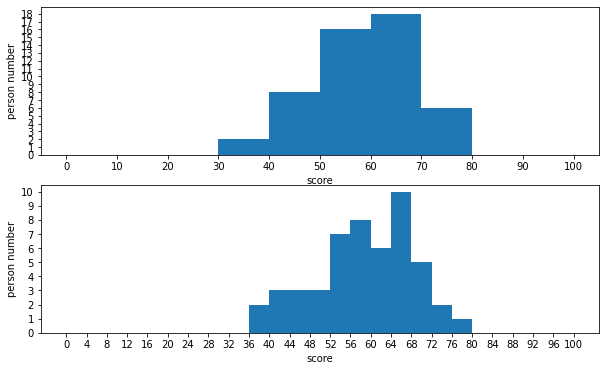

In [33]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(211)
freq,_,_= ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))

ax = fig.add_subplot(212)
freq, _, _ = ax.hist(english_scores,bins=25,range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show()

### 상대도수의 히스토그램을 누적상대도수 꺾은선 그래프와 같이 그리기

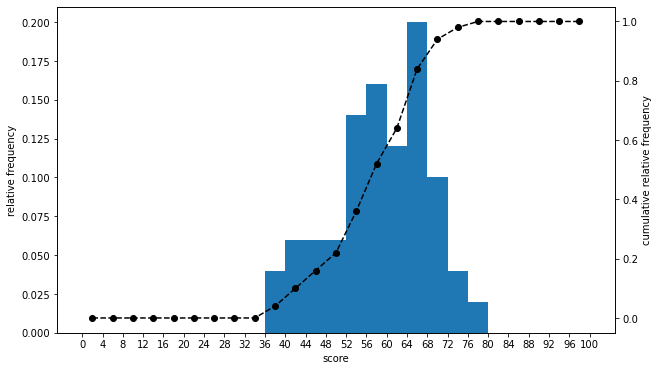

In [42]:
fig = plt.figure(figsize=(10,6))
# add_subplot(111) fig틀 안에 몇개가 들어갈지를 정하는것 ()
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
#  이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                         range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]
#꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o' 으로 하면 데이터 점을 그림
# 인수 color를 'gray' 로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
        ls='--', marker='o', color='black')
# 꺾은선 그래프의 눈금선을 제거(그래프 배경의 회색선)
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

### 상자그림 (box plot)

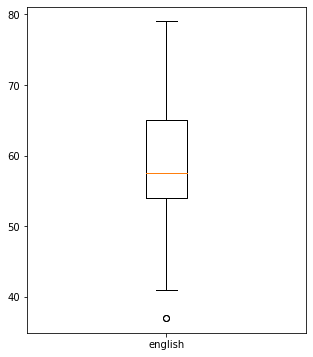

In [43]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()

## 2차원 데이터 정리

In [4]:
import numpy as np
import pandas as pd
# 소수점 3자리까지 표시
%precision 3
pd.set_option('display.precision',3)

In [5]:
df= pd.read_csv('./ch2_scores_em.csv',
               index_col='student number')

In [6]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                         'mathematics':ma_scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                      name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 도수분포표 만들기

In [7]:
summary_df = scores_df.copy()
summary_df['english_deviation']= summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation']= summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations']= summary_df['english_deviation']*summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


### 분산 평균값 (공분산?)

In [8]:
summary_df['product of deviations'].mean()

62.8

### Numpy cov함수로 공분산 구하기

In [9]:
cov_mat=np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

#### [0,1]은 영어 공분산, [1,0] 수학 공분산 값

In [10]:
cov_mat[0,1],cov_mat[1,0]

(62.800000000000004, 62.800000000000004)

#### [0,0] [1,1]은 영어 수학 분산 값

In [11]:
cov_mat[0,0], cov_mat[1,1]

(86.0, 68.44000000000001)

#### 분산값 계산해보기

In [12]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

### 상관계수

#### 영어와 수학의 상관계수 구하기

In [62]:
np.cov(en_scores, ma_scores, ddof=0)[0,1]/(np.std(en_scores)*np.std(ma_scores))

0.819

#### corrcoef 함수로 상관계수 구하기

In [63]:
# [0,1]은 영어 상관계수, [1,0] 수학 상관계수
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

#### Dataframe 의 경우 corr 메서드와 동일한 결과

In [64]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


### 2차원 데이터의 시각화

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

#### 산점도

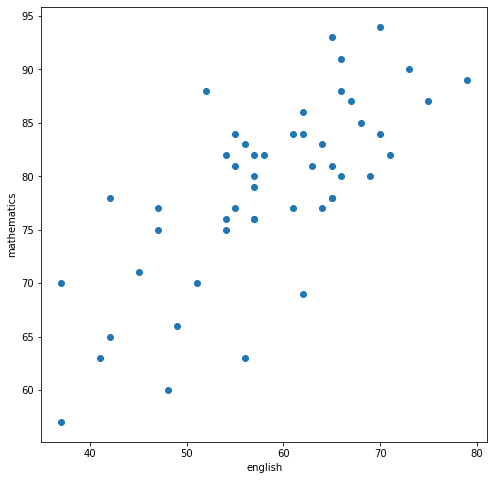

In [66]:
english_scores=np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
#산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

#### 희귀직선( Matplotlib 에는 희귀직선 그리는 메서드 없어서 Numpy 사용)

In [13]:
#계수 0과 1을 구한다.
poly_fit = np.polyfit(english_scores, math_scores,1)
#0+1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
#직선을 그리기 위해 x좌표를 생성
xs= np.linspace(english_scores, math_scores,max())
#xs 에 대응하는 y좌표를 구한다.
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.ploot(xs, ys, color='black',
        label=f'{poly_fit[1]:.2f}+ {poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
#범례 표시
ax.legend(loc='upper left')

plt.show()

NameError: name 'english_scores' is not defined

#### 히트맵

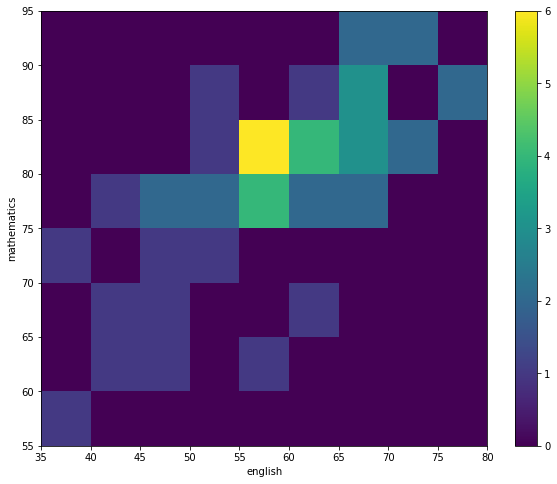

In [71]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c=ax.hist2d(english_scores, math_scores,
           bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
#컬러 바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

### 앤스컴의 예  84p
- (데이터 부석할 때는 가능하면 그림을 그려하는 것 예시로 보여줌)

- Numpy 형식 파일 읽어오기
import numpy as np
anscombe_data = np.load('./ch3_anscombe.npy')
print(anscombe_data.shape) # 2차원이 4개 11행 2열 (4,11,2)
anscombe_data[0]

- 아래 데이터표로 볼경우 data1 부터 4까지의 값들이 전부 같다. 하지만 시각화에선 다르다 그러기에 시각화

In [13]:
import pandas as pd
stats_df = pd.DataFrame(index=['x-mean','x_variance','y_mean','y_variance','x&y_correlation','x&y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}']=\
            [f'{np.mean(dataX):.2f}',
             f'{np.var(dataX):.2f}',
             f'{np.mean(dataY):.2f}',
             f'{np.var(dataY):.2f}',
             f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
             f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df  

,data1,data2,data3,data4
x-mean,9.00,9.00,9.00,9.00
x_variance,10.00,10.00,10.00,10.00
y_mean,7.50,7.50,7.50,7.50
y_variance,3.75,3.75,3.75,3.75
x&y_correlation,0.82,0.82,0.82,0.82
x&y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


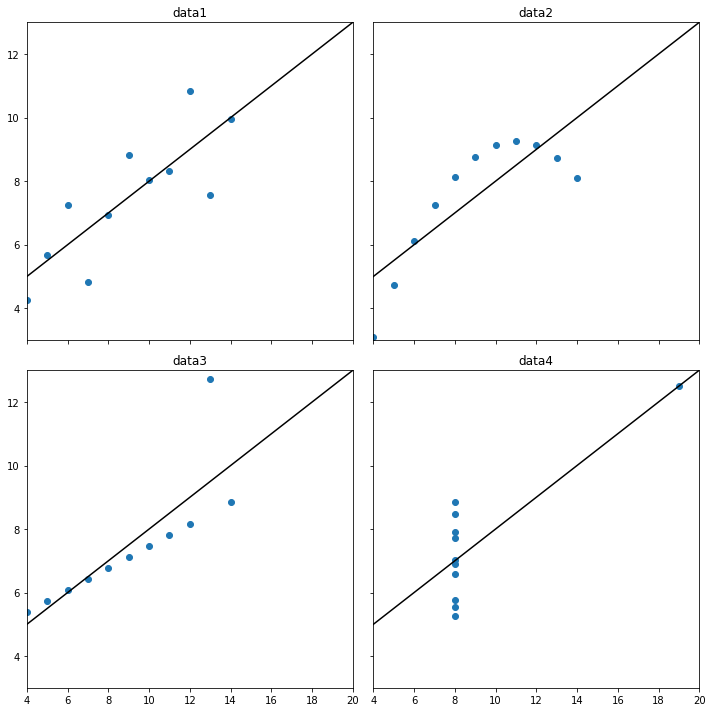

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10),
                        sharex = True, sharey = True)

xs = np.linspace(0,30,100)
for i , data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0],data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='black')
    
#그래프 사이의 간격을 좁힌다
plt.tight_layout()
plt.show()

#### polyfit함수 사용법
poly(x,y,차수) 형태로 매우 간단하게 이용이 가능.
polyfit (x,y,n)
첫번째 값 : 기울기
두번째 값 :  y축 절편을 구해줌(x가 0일때)
만약 차수가 2개이면 기울기값을 2개 5개면 5개를 구해줌


In [17]:

x = [1,2,3,4,5,6]
y = [1,3,6,8,11,19]

print(np.polyfit(x,y,1))
# y = 3.314x - 3.6

[ 3.31428571 -3.6       ]


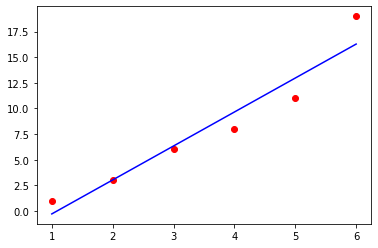

In [18]:
poly = np.polyfit(x,y,1)
y_pred = np.array(x) * poly[0] + poly[1]

plt.plot(x,y_pred, color = 'b')
plt.scatter(x,y,color = 'r')
plt.show()

[ 0.53571429 -0.43571429  1.4       ]


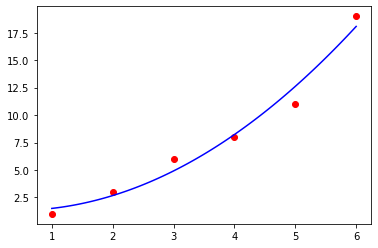

In [24]:
# 2차 회귀식 및 시각화
print(np.polyfit(x,y,2))

poly = np.polyfit(x,y,2)
x_line = np.linspace(1,6,100)# 곡선을 완만하게 그리기 위한 linspace 객체 선언
y_pred = x_line**2*poly[0] + x_line * poly[1] + poly[2]

plt.plot(x_line, y_pred, color = 'b')
plt.scatter(x,y,color = 'r')
plt.show()

[ -0.01666667   0.41666667  -3.41666667  12.08333333 -16.06666667
   8.        ]


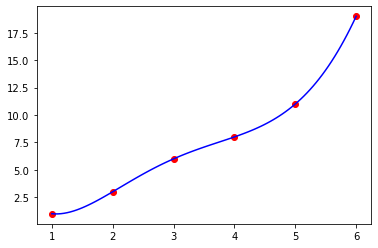

In [26]:
poly = np.polyfit(x,y,5)
print(poly)
x_line = np.linspace(1,6,100)
y_pred = np.zeros_like(x_line)  # 예측값을 담을 그릇(모듬값이 0인 배열)
for i in range(6):
    y_pred += x_line**(5-i) * poly[i]
plt.plot(x_line, y_pred, color = 'b')
plt.scatter(x,y,color='r')
plt.show()

## 추측통계의 기본

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [15]:
df = pd.read_csv('./ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

### 표본추출 방법 - 무작위추출

In [16]:
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [17]:
# replace=False 를 주면 중복값 초이스를 하지 않음
np.random.choice([1,2,3,],3, replace=False)

array([1, 2, 3])

- 무작위 추출해  표본평균 계산하기

In [18]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.4

In [19]:
scores.mean()

69.53

In [20]:
# 무작위추출을 실행시마다 결과 달라짐 그래서 표본평균도 달라지기에 몇번 반복 실행으로 결과보기
for i in range(5):
    sample = np.random.choice(scores,20)
    print(f'{i+1}번째 무작위 추출 표본평균',sample.mean())


1번째 무작위 추출 표본평균 72.45
2번째 무작위 추출 표본평균 63.7
3번째 무작위 추출 표본평균 66.05
4번째 무작위 추출 표본평균 71.7
5번째 무작위 추출 표본평균 74.15


### 확률분포

#### 불공정 주사위 만들어 실험

In [21]:
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [22]:
# 여기서 랜덤 초이스 안의 p는 확률을 설정해줌
np.random.choice(dice,p=prob)

1

#### 100번 실행해보기

In [23]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

#### 도수분포표 와 히스토그램 만들기

In [24]:
freq,_ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({' frequency': freq,
             'relative frequency':freq/num_trial},
            index=pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


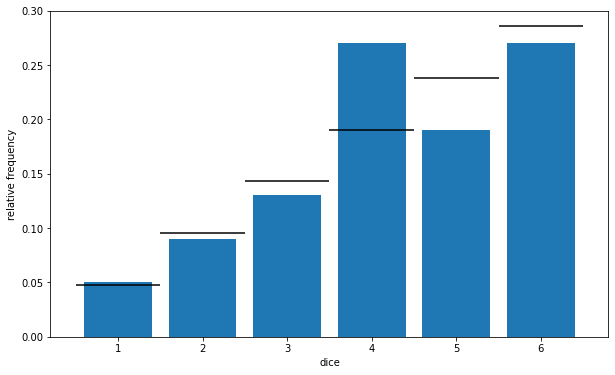

In [25]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='black')
# 막대그래프의 [1.5, 2.5 ...]에 눈금을 표시
ax.set_xticks(np.linspace(1.5,6.5,6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

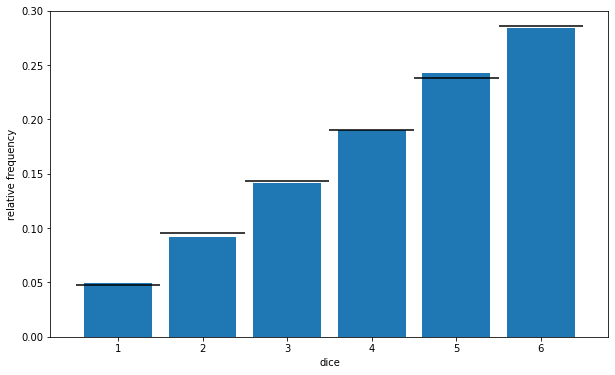

In [26]:
# 10000번 실행해보기
num_trial = 10000
sample = np.random.choice(dice, num_trial, p=prob)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='black')
ax.set_xticks(np.linspace(1.5,6.5,6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

### 추측통계의 확률

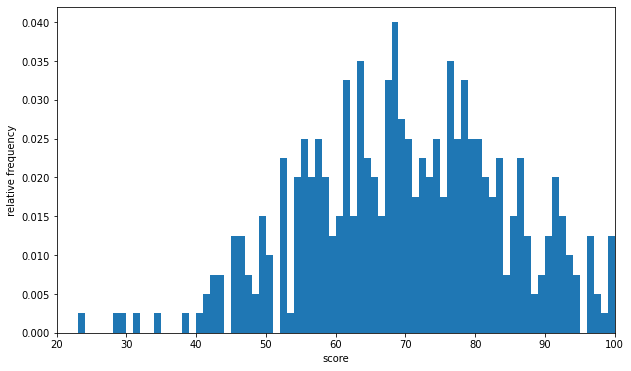

In [27]:

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel( 'score' )
ax.set_ylabel( ' relative frequency ')
plt.show()

In [28]:
np.random.choice(scores)

89

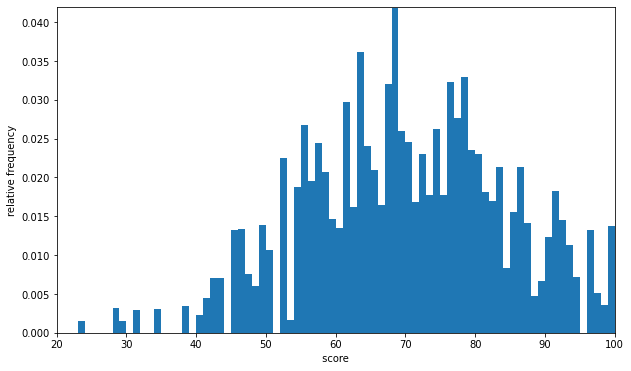

In [33]:
# 10000개로 표본 추출하여 히스토그램으로 보기
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0,0.042)
ax.set_xlabel( ' score ')
ax.set_ylabel('relative frequency')
plt.show()

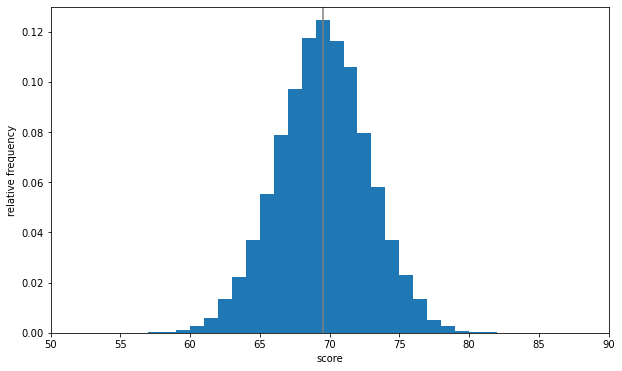

In [109]:
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores),0,1, 'gray')
ax.set_xlim(50,90)
ax.set_ylim(0,0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

## 이산형 확률변수

### 1차원

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%precision 3
'%.3f'

'%.3f'

In [2]:
x_set = np.array([1,2,3,4,5,6])
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [4]:
x = [x_set, f]
prob = np.array([f(x_k) for x_k in x_set])
print(prob,'\n')
dict(zip(x_set, prob))

[0.048 0.095 0.143 0.19  0.238 0.286] 



{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

Text(0, 0.5, 'probability')

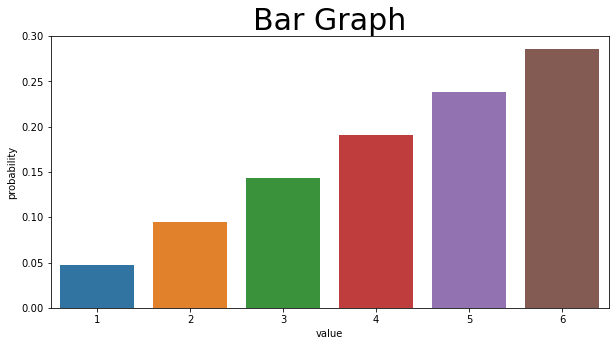

In [11]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.barplot(x_set,prob)
plt.title('Bar Graph', fontsize=30)
ax.set_xlabel('value')
ax.set_ylabel('probability')

In [12]:
np.all(prob >= 0)

True

In [13]:
np.sum(prob)

1.000

- 누적분포함수

In [113]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [118]:
# 분포함수(누적분포함수)를 통해 3이하가 되는 확률 구하기
F(3)

0.238

- 확률변수의 변환

In [16]:
# 확률변수 x에 2를 곱하고 3을 더한 2x + 3도 확률변수가 된다.
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

### 1차원 이산형 확률변수의 지표

#### 기대값

In [45]:
np.sum([x_k * f(x_k) for x_k in x_set])
X = [x_set, f]

In [29]:
# 확률변수의 기대값은 확률변수를 무제한 시행하여 얻은 실현값의 평균
sample = np.random.choice(x_set, int(1e6),p=prob)  #1e6 -> 100만
sample = np.random.choice(x_set, int(1e9))
print(sample)
np.mean(sample)

[6 4 1 ... 6 5 2]


3.500

In [46]:
# 일반화
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [47]:
E(X)

4.333

In [48]:
E(x, g=lambda x: 2*x+3)

11.667

In [49]:
# 기대값의 선형성
2 * E(X) +3

11.667

#### 분산

In [66]:
mean = E(X)
np.sum([(x_k - mean)**2* f(x_k) for x_k in x_set])

2.222

In [67]:
def V(X, g=lambda x: x):
    x_set, f = x
    mean = E(x,g)
    return np.sum([g(x_k - mean)**2*f(x_k) for x_k in x_set])

In [68]:
V(X)

2.222

In [69]:
V(X, lambda x: 2*x + 3)

145.000

In [70]:
2**2*V(X)

8.889

### 2차원 이산형 확률변수

In [73]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)
def f_XY(x, y):
    if 1 <= y <=6 and 1<= x - y <= 6:
        return y* (x-y) / 441
    else:
        return 0

In [74]:
XY = [x_set, y_set, f_XY]

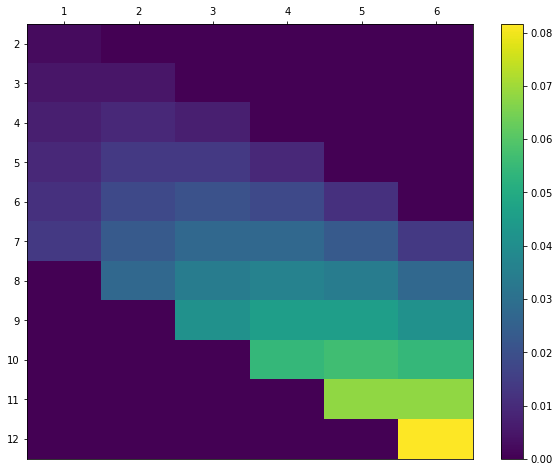

In [75]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)
# y축을 내림차순의 숫자가 되게하여, 위 아래를 역전시킨다.
ax.invert_yaxis()
# x축 눈금을 그래프 위족에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [76]:
np.all(prob >=0)

True

In [77]:
np.sum(prob)

1.000

In [78]:
# 주변확률 분포
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [79]:
def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

In [80]:
X = [x_set, f_X]
Y = [y_set, f_Y]

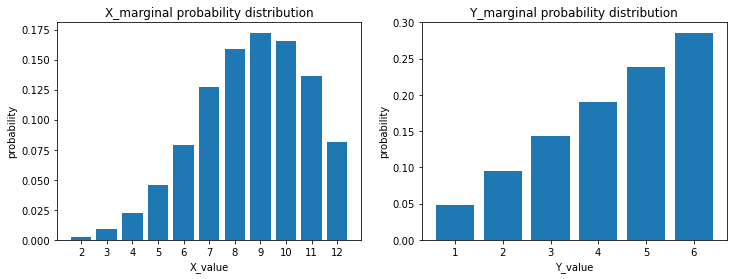

In [83]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 2차원 이산형 확률변수의 지표

- 기대값

In [84]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [86]:
def E(XY, g):
    x_set, Y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

In [87]:
mean_X = E(XY, lambda x, y:x)
mean_X

8.667

In [88]:
mean_Y= E(XY, lambda x, y:y)
mean_Y

4.333

In [89]:
a, b = 2, 3

In [90]:
E(XY, lambda x, y : a*x + b*y)

30.333

In [91]:
a* mean_X + b* mean_Y

30.333

- 분산

In [95]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j) 
        for x_i in x_set for y_j in y_set])

4.444

In [97]:
# 분산의 함수로 구현
def V(XY,g):
    x_set, y_set, f_XY = XY
    mean =E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

In [98]:
# X와 Y의 분산값은
var_X = V(XY, g=lambda x, y:x)
var_X

4.444

In [99]:
var_Y = V(XY, g=lambda x, y:y)
var_Y

2.222

- 공분산

In [102]:
def Cov(XY):
    x_set, y_set, f_XY =XY
    mean_X =E(XY, lambda x, y:x)
    mean_Y = E(XY, lambda x, y:y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

In [103]:
cov_xy = Cov(XY)
cov_xy

2.222

In [104]:
# 분산과 공분산의 공식
V(XY, lambda x, y : a*x + b*y)

64.444

In [106]:
a**2 * var_X +  b**2 * var_Y + 2*a*b * cov_xy

64.444

- 상관계수

In [108]:
cov_xy / np.sqrt(var_X * var_Y)

0.707

In [9]:
pip install scipy

     --------------------------------------- 34.1/34.1 MB 34.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## 대표적인 이산형 확률분포

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%precision 3

'%.3f'

In [11]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X): # 확률변수를 인수로 가지며 기댓값과 분산 계산 결과를 반환
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'     # assert  이 조건을 확신한다;;???
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')
    
def plot_prob(X): # 확률변수를 인수로 가지며 그 확률변수의 확률함수와 기댓값을 그리기 위한 함수
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()


### 베르누이 분포
- 가장 기본적인 이산형 확률분포로 확률변수가 취할 수 있는 값이 0과 1밖에 없는 분포이다.
- 베르누이 분포를 따르는 확률변수의 시행을 베르누이 시행이라하며 1이 나오면 성공 0이 나오면 실패라고 함
- 동전을 던져 앞면이 나올 확률, 주사위를 한 번 굴려 6이 나오지 않을 확률


In [12]:
def Bern(p):
    x_set =np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [13]:
p =0.3
X = Bern(p)

In [14]:
print(E(X))
V(X)

0.3


0.20999999999999996

In [15]:
check_prob(X)

expected value 0.3
variance 0.21


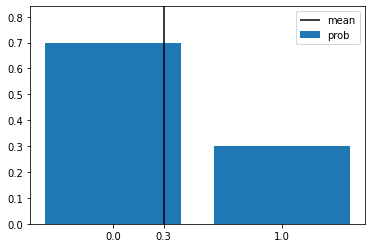

In [17]:
plot_prob(X)

In [18]:
rv = stats.bernoulli(p)

In [19]:
rv.pmf(0), rv.pmf(1)

(0.7, 0.3)

In [20]:
rv.pmf([0,1])

array([0.7, 0.3])

In [21]:
rv.cdf([0,1])

array([0.7, 1. ])

In [22]:
rv.mean(), rv.var()

(0.3, 0.21)

### 이항분포
성공 확률이 p인 베르누이 시행을 n번 했을 때의 성공 횟수가 따르는 분포  
f(x) = $_{n}\mathrm{C}_{x}p^x(1-p)^{n-x}$ $(x \in \{0,1,..,n\}$)
       
       0                     (otherwise)

In [23]:
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p **x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f


In [27]:
# 동전을 10번 던져 앞면이 3번 나오는 확률의 이항분포
n = 10
p = 0.3
X = Bin(n,p)

In [28]:
check_prob(X)

expected value 3.0
variance 2.1


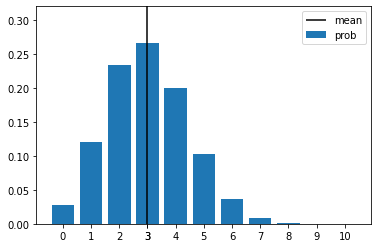

In [29]:
plot_prob(X)

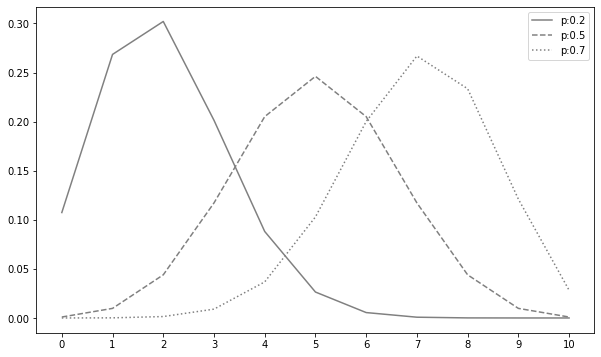

In [31]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p, ls in zip([0.2, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

### 기하분포
- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 기하분포의 파라미터는 베르누이 시행의 성공 확률 파라미터 p가 되며 파라미터 p의 기하분포를 Ge(p)로 표기  

f(x) = $(1-p)^{x-1}p$ $(x \in \{0,1,2,3,..\})$

       0              (otherwise) 
       
- 기하분포의 기댓값과 분산 : E(X) = 1/p, V(X) = (1-p)/$p^2$


In [33]:
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return p*(1-p)**(x-1)
        else:
            return 0
    return x_set, f

In [34]:
p = 0.5
X = Ge(p)

In [35]:
check_prob(X)

expected value 2.0
variance 2.0


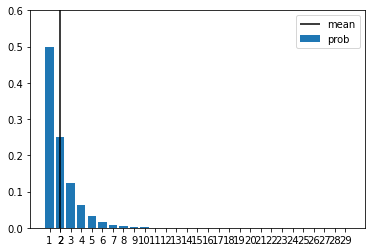

In [36]:
plot_prob(X)

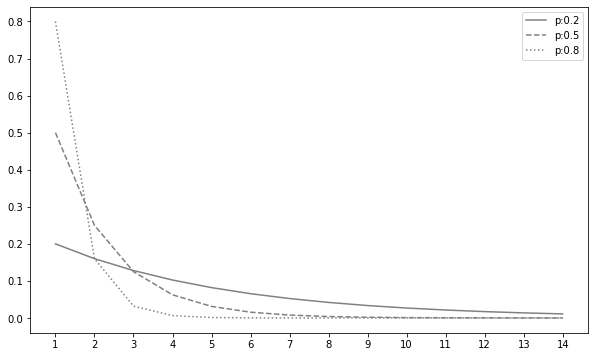

In [41]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

### 포아송 분포
- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포이며 포아송 분포의 파라미터는 $\lambda$로 나타낸다.
- 하루에 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 건수는 Poi(2)를 따른다.  
P(X=0) = 2!/0! * $e^{-2}$ = 0.135

- 포아송 분포의 기댓값과 분산을 모두 $\lambda$ 가 된다.

f(x) = $\lambda^x/x!*e^{-\lambda}$ $(x \in \{0,1,2,...\})$

       0               (otherwise)


In [48]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam,x) / factorial(x) * np.exp(-lam)
        else :
            return 0
    return x_set, f

In [49]:
lam = 3
X = Poi(lam)

In [50]:
check_prob(X)

expected value 3.0
variance 3.0


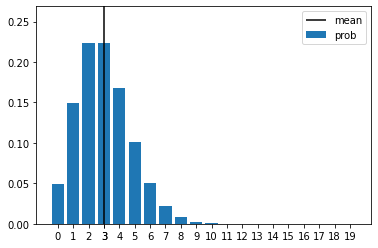

In [51]:
plot_prob(X)

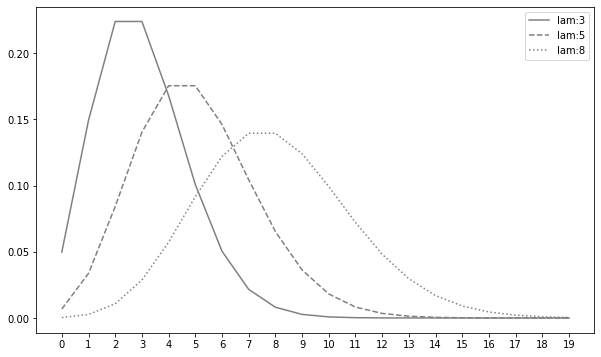

In [53]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'lam:{lam}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()